# Z mass peak-to-tail k factor

### Why?

 - Inverse mass cut improves signal region S/B ratio
 - Fake rate estimation uses Z peak to extract pure Z->ee sample from data
 - No comparable handle for Z tail in control regions
 - Need a way to measure k-factor that predicts tail from peak prediction, from a separate control region




|          |  MET<25   |MET>25   |
|----------|-----------|-----------|
|pass eVeto|A          |Signal - invert $m(Z)$ cut     |
|fail eVeto|B          | D         |

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20
- electron: tight, pT>10
- muon: tight, pT> 

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

## Import Samples

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [2]:
!date

Mon Sep 10 18:23:06 EDT 2018


In [3]:
%run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_Mlpp_elg_2018_09_10 \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py --lumi 35900. \
--treeName UMDNTuple/EventTree --fileName tree.root


Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
Sample GJets_HT-600ToInf              cross section : 93.380000 pb     N Events : 2463946  sample lumi : 26386.228314      Scale : 1.360558      
Sample WZ3LNLO                        cross section : 5.260000 pb      N Events : 8260201  sample lumi : 1570380.418251    Scale : 0.022861      
Sample WJetsToLNu_HT-800To1200        cross section : 7.484300 pb      N Events : 1544513  sample lumi : 206367.061716     Scale : 0.173962      
Sample WJetsToLNu_HT-600To800         cross section : 16.288000 pb     N Events : 3779141  sample lumi : 232019.953340     Scale : 0.154728      
Sample GJets_HT-100To200              cross section : 9226.000000 pb   N Events : 5131873  sample lumi : 556.240299        Scale : 64.540451     
Sample ResonanceMass2000              cross section : 0.000172 pb      N Events : 50000    sample lumi : 289872165.921251  Scale : 0.000124  

In [4]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
a3 = '&& ph_passEleVeto[0]==1' #CSEV
b3 = '&& ph_passEleVeto[0]==0' 
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'

xbin = range(0,50,2)+[50,52,54,60,65,75,80]
hist_config = {'colors' : [ROOT.kRed, ROOT.kBlack], 'doratio' : 1,'xlabel':'MET','rlabel':'red/black' }

In [5]:
ROOT.gROOT.SetBatch()

## Fill histogram

In [6]:
[s for s in samples.samples]

[<Sample SingleElectron at 7f4554be56c8>,
 <Sample DYJetsToLL_M-50 at 7f45542b5878>,
 <Sample ZGTo2LG at 7f45542b58c0>,
 <Sample WGToLNuG-madgraphMLM at 7f45542b5908>,
 <Sample WGToLNuG_PtG-130-madgraphMLM at 7f45542b5950>,
 <Sample WGToLNuG_PtG-500-madgraphMLM at 7f45542b5998>,
 <Sample WGToLNuG-madgraphMLMMTResCut at 7f45542b59e0>,
 <Sample WGToLNuG_PtG-130-madgraphMLMMTResCut at 7f45542b5a28>,
 <Sample WGToLNuG_PtG-500-madgraphMLMMTResCut at 7f45542b5a70>,
 <Sample WJetsToLNu-madgraphMLM at 7f45542b5ab8>,
 <Sample DiPhoton at 7f45542b5b00>,
 <Sample Data at 7f45542b5b90>,
 <Sample Z+jets at 7f45542b5b48>,
 <Sample Zgamma at 7f45542b5bd8>,
 <Sample WgammaLO at 7f45542b5c68>,
 <Sample GammaGamma at 7f45542b5c20>,
 <Sample MCBackgroundLO at 7f45542b5cb0>,
 <Sample EleFakeBackground at 7f45542b5e60>]

In [7]:
samples.deactivate_sample("Data")

Deactivate sample Data


In [8]:
samples.change_stack_order("Zgamma","Z+jets")

In [9]:
samples.Draw('m_lpp_best',baseeta +"&& ph_n==2 && ph_hasPixSeed[0]==0 ",(50,0,200))

Creating hist for Zgamma
ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && ph_hasPixSeed[0]==0 
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && ph_hasPixSeed[0]==0 
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma
['ZGTo2LG']
Scale Zgamma by 1.000000
Creating hist for Z+jets
ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && ph_hasPixSeed[0]==0 
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && ph_hasPixSeed[0]==0 
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR Z+jets
['DYJetsToLL_M-50']
Scale Z+jets by 1.000000
Creating hist for GammaGamma
ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && ph_hasPixSeed[0]==0 
Draw grouped hist DiPhoton
Creating hist for DiPhoton
ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && ph_hasPixSeed[0]==0 
Scale DiPhoton by 0.458671
RUN GROUPING FOR GammaGamma
['DiPhoton']
Scale GammaGamma by 1.000000
Scale __Al

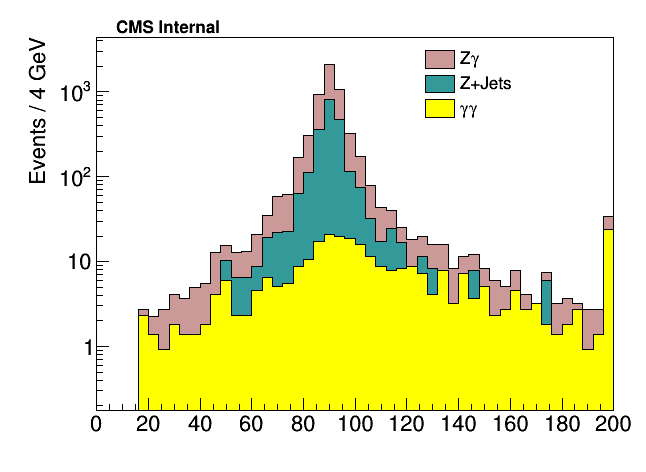

Info in <TCanvas::Print>: png file /tmp/tmp8Kx7vp.png has been created


In [10]:
samples.curr_canvases['base']

## conclusion:

 - It may be simpler if we are to a different Z+X sample. What is X?


Kak Wong, 2018-09-11

In [11]:
!date

Mon Sep 10 18:23:18 EDT 2018





### BACKUP



In [12]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_lep_ph', [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],['Zgamma']*2, (50,0,200),
                          hist_config, {}, {'legend_entries':['Z#gamma : 1 #gamma +1e', ' Z#gamma : 2 #gamma +1e']})

removing sample __AllStack__
Creating hist for m_lep_ph
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph
['ZGTo2LG']
Scale m_lep_ph by 1.000000
Creating hist for m_lep_ph_0
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_0
['ZGTo2LG']
Scale m_lep_ph_0 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph at 7f45543e00e0>, <Sample m_lep_ph_0 at 7f45543e0b48>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### ele+leading $\gamma$ reconstructed mass 
 - invariant mass of leading photon and electron in Zgamma sample
 - 1 photon curve is messed up probably because an electron managed to be undetected
 - 2 photon curve the other peak arise from incorrect choice of photon in reconstructed mass

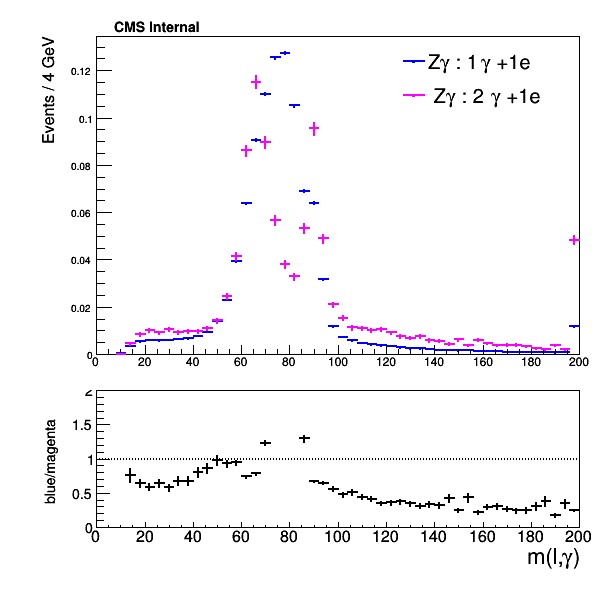

Info in <TCanvas::Print>: png file /tmp/tmpO4uSFg.png has been created


In [13]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

samples.curr_canvases['base']


In [14]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,         'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_lep_ph', [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample m_lep_ph
removing sample m_lep_ph_0
removing sample ratioZgamma
Creating hist for m_lep_ph_1
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_1
['DYJetsToLL_M-50']
Scale m_lep_ph_1 by 1.000000
Creating hist for m_lep_ph_2
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_2
['ZGTo2LG']
Scale m_lep_ph_2 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph_1 at 7f45543e00e0>, <Sample m_lep_ph_2 at 7f455440a200>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


In [15]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

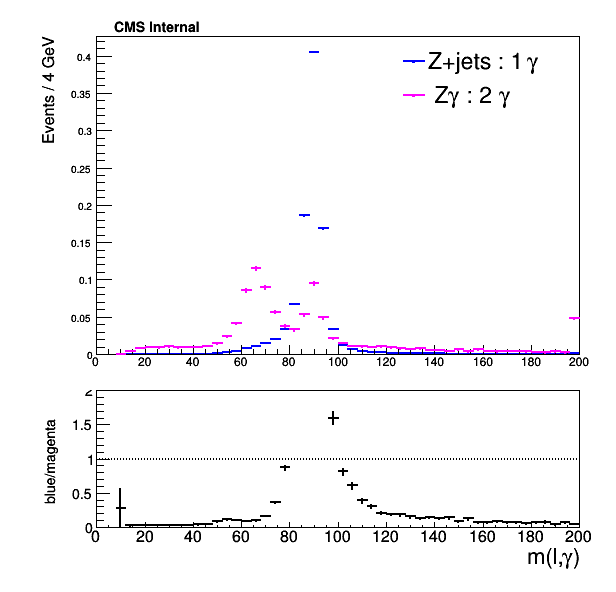

Info in <TCanvas::Print>: png file /tmp/tmp73uPee.png has been created


In [16]:
samples.curr_canvases['base']


#### Here:
 - one peak is correctly reconstructed with the fake
 - whereas lower peak used the real photon instead
 - choosing the less energetic photon may lead to higher mass if it is more antagonal to the electron object

In [17]:
ROOT.gStyle.SetPalette(ROOT.kBird)
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0]', baseeta +"&& ph_n==2",
               'Zgamma',(160,0,400,60,0,300),'COLZ','M(l,#gamma_{1})','M(l,#gamma_{2})')


removing sample m_lep_ph_1
removing sample m_lep_ph_2
removing sample ratioZgamma
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000



### 2D plot: comparing reconstructed mass from leading v subleading photon

 - plotting $m (l, \gamma_{1})$ and $m (l, \gamma_{2})$
 - clearly see Z peak as a cross in the plot
 - extra blob at $M\sim60GeV$
 
 

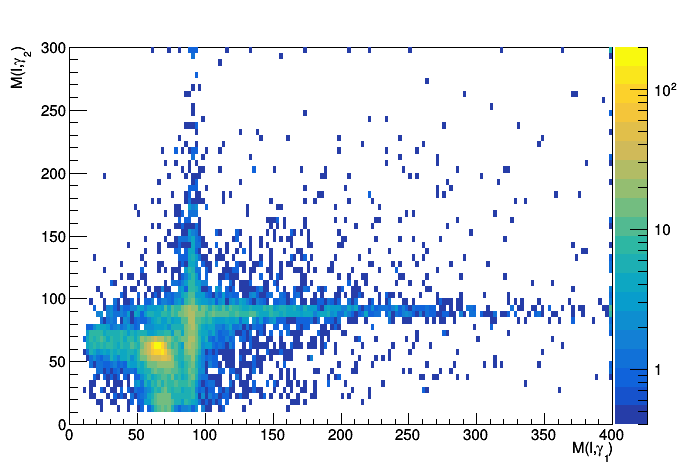

Info in <TCanvas::Print>: png file /tmp/tmp8QAAzt.png has been created


In [18]:
samples.samples[-1].hist.GetZaxis().SetRangeUser(0.4,200)
samples.samples[-1].hist.SetStats(0)
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']

In [19]:
samples.Draw2D( 'm_lep_ph_comb_leadLep[0]:m_lep_ph_ph', baseeta +"&& ph_n==2",
               'Zgamma',(160,0,400,60,0,300),'COLZ','M(l,#gamma_{1},#gamma_{2})','M(l,#gamma_{1})')


removing sample Zgamma_0
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[0]:m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[0]:m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(160, 0, 400, 60, 0, 300)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: basecan0


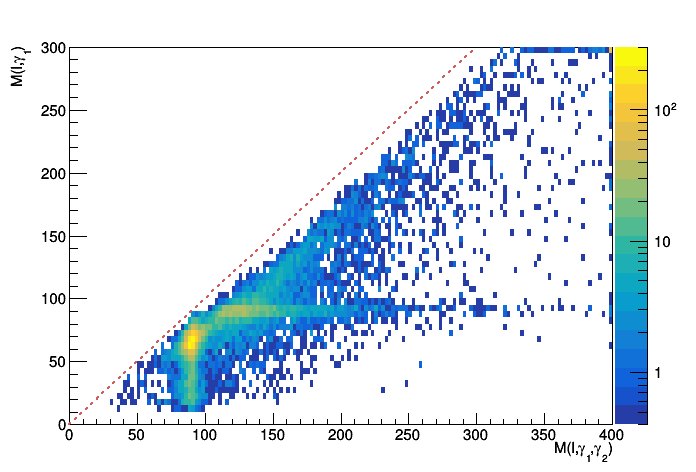

Info in <TCanvas::Print>: png file /tmp/tmpbTYpPP.png has been created


In [20]:
samples.samples[-1].hist.GetZaxis().SetRangeUser(0.4,300)
samples.samples[-1].hist.SetStats(0)
line =  ROOT.TLine(0,0,300,300);
line.SetLineWidth(2);
line.SetLineStyle(2);
line.SetLineColor(46);
line.Draw()
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']


In [21]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma,#gamma)',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lep_ph_ph'], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],
                          ['Z+jets','Zgamma'], (50,0,200), hist_config, {},
                          {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma, m_{l#gamma#gamma}']})

removing sample Zgamma_0
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_3
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_3
['DYJetsToLL_M-50']
Scale m_lep_ph_3 by 1.000000
Creating hist for m_lep_ph_4
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_4
['ZGTo2LG']
Scale m_lep_ph_4 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph_3 at 7f4554410758>, <Sample m_lep_ph_4 at 7f4554410ab8>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


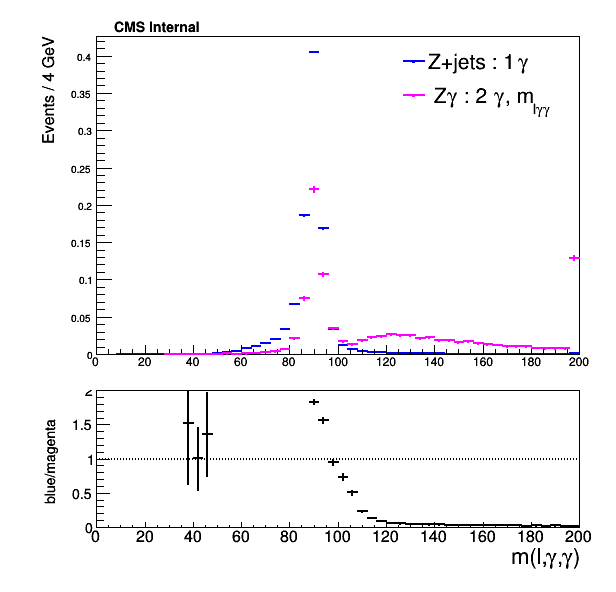

Info in <TCanvas::Print>: png file /tmp/tmpgIyDLX.png has been created


In [22]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

samples.curr_canvases['base']


In [23]:
ROOT.gStyle.SetPalette(ROOT.kBird)
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0]', 
               baseeta +"&& ph_n==2 && trueph_n==1 && trueph_motherPID==23",
               'Zgamma',(90,0,300,60,0,200),'COLZ','M(l,#gamma_{1})','M(l,#gamma_{2})')


removing sample m_lep_ph_3
removing sample m_lep_ph_4
removing sample ratioZgamma
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==23 
(90, 0, 300, 60, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==23 
(90, 0, 300, 60, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


### leading vs subleading $\gamma$ reconstructed mass $m_{l,\gamma}$ with gen photon motherPID = 23 ($Z_{0}$) 

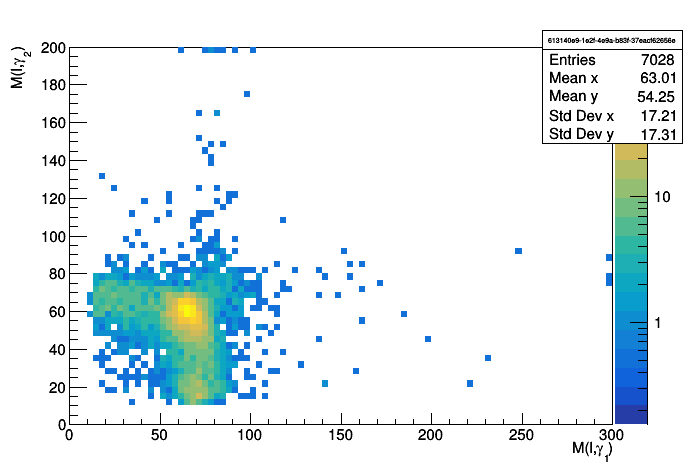

Info in <TCanvas::Print>: png file /tmp/tmpD8mEeS.png has been created


In [24]:
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']

In [25]:
ROOT.gStyle.SetPalette(ROOT.kBird)
samples.Draw2D( 'm_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0]', 
               baseeta +"&& ph_n==2 && trueph_n==1 && trueph_motherPID==22",
               'Zgamma',(90,0,300,60,0,200),'COLZ','M(l,#gamma_{1})','M(l,#gamma_{2})')


removing sample Zgamma_0
Creating hist for Zgamma_0
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==22 
(90, 0, 300, 60, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]:m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_n==1 && trueph_motherPID==22 
(90, 0, 300, 60, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR Zgamma_0
['ZGTo2LG']
Scale Zgamma_0 by 1.000000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: basecan0


### leading vs subleading $\gamma$ reconstructed mass $m_{l,\gamma}$ with gen photon motherPID = 22 ($\gamma_{0}$) 

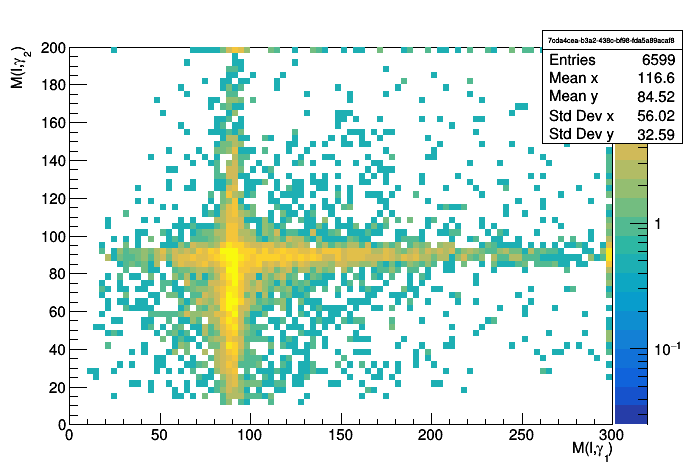

Info in <TCanvas::Print>: png file /tmp/tmpOFacrv.png has been created


In [26]:
samples.curr_canvases['base0'].SetLogz()
samples.curr_canvases['base0']

### notes

- Data card for Zgamma generator:

https://github.com/cms-sw/genproductions/blob/9804294c57bb1e9796382fc92090075b9a4a84bc/bin/MadGraph5_aMCatNLO/cards/production/13TeV/ZATo2LA01j_5f_NLO_FXFX/ZATo2LA01j_5f_NLO_FXFX_run_card.dat

1. when mother PID = 22 (photon): 

    - the mother photon comes from a hard interaction quark

    - electron pt sums to Z mass 

1. when mother PID = 23 (Z boson):

    - photon is collinear with one of the electron
    - pt sum of electron seems off the mark from Z mass, seems to be of the order photon pT

--- 1 ---

    
    ***********************************************************************************
    *    Row   * Instance *   gen_PID * gen_mothe * gen_fromH *   gen_phi *   gen_pt  *
    ***********************************************************************************
    *       12 *        0 *        23 *         2 *         0 * -2.242582 * 11.536655 *
    *       12 *        1 *        22 *         2 *         0 * 0.8990098 * 11.536655 *
    *       12 *        2 *        23 *        23 *         0 * -2.388667 * 18.662937 *
    *       12 *        3 *        23 *        23 *         0 * -2.444482 * 17.589969 *
    *       12 *        4 *        23 *        23 *         0 * -2.319227 * 19.507524 *
    *       12 *        5 *        23 *        23 *         0 * -2.387543 * 19.809474 *
    *       12 *        6 *        23 *        23 *         0 * -2.414541 * 19.689378 *
    *       12 *        7 *        22 *        22 *         1 * 2.8962256 * 10.515576 *<<<
    *       12 *        8 *        11 *        23 *         0 * -2.124343 * 55.441967 *
    *       12 *        9 *       -11 *        23 *         0 * 1.1700824 * 37.007217 *
    *       12 *       10 *        11 *        11 *         1 * -2.125319 * 55.112918 *<<<
    *       12 *       11 *       -11 *       -11 *         1 * 1.1700824 * 37.002239 *<<<
    *       12 *       12 *        21 *      2212 *         0 * 0.5243875 * 20.684333 *


--- 2 ---
    
    ***********************************************************************************
    *    Row   * Instance *   gen_PID * gen_mothe * gen_fromH *   gen_phi *   gen_pt  *
    ***********************************************************************************
    *        0 *        0 *        23 *        23 *         0 * -1.651171 * 5.5309357 *
    *        0 *        1 *        23 *        23 *         0 * -1.450965 * 7.2031130 *
    *        0 *        2 *        23 *        23 *         0 * -1.239111 * 6.9933800 *
    *        0 *        3 *        13 *        23 *         0 * 0.0910035 * 33.902069 *<<<<
    *        0 *        4 *       -13 *        23 *         0 * -2.899175 * 45.351413 *<<<
    *        0 *        5 *        22 *        23 *         1 * 0.0948786 * 12.597539 *<<<<
    *        0 *        6 *        13 *        13 *         0 * 0.0910088 * 33.892955 *
    *        0 *        7 *       -13 *       -13 *         0 * -2.899175 * 45.351413 *
    *        0 *        8 *       -13 *       -13 *         1 * -2.899175 * 45.351413 *
    *        0 *        9 *        13 *        13 *         1 * 0.0910088 * 33.892955 *
    *        0 *       10 *         1 *      2212 *         0 * -1.488160 * 5.7920198 *
    *        0 *       11 *         2 *      2212 *         0 * 0.1679915 * 6.0793767 *
    *        0 *       12 *        21 *      2212 *         0 * 1.8993362 * 6.9830250 *
    *        0 *       13 *        21 *      2212 *         0 * 0.8363395 * 7.0736775 *
    *        0 *       14 *        21 *      2212 *         0 * 2.3591649 * 5.8912453 *
    *        0 *       15 *         2 *      2212 *         0 * 0.6795014 * 8.8710212 *```

In [27]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'reconstructed mass',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lep_ph_ph'], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2&& trueph_motherPID==23 "],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample Zgamma_0
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_5
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_5
['DYJetsToLL_M-50']
Scale m_lep_ph_5 by 1.000000
Creating hist for m_lep_ph_6
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2&& trueph_motherPID==23  
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2&& trueph_motherPID==23  
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_6
['ZGTo2LG']
Scale m_lep_ph_6 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph_5 at 7f4554410e60>, <Sample m_lep_ph_6 at 7f455440aef0>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### e+2$\gamma$ mass in Zgamma events where generator photon has Z as mother

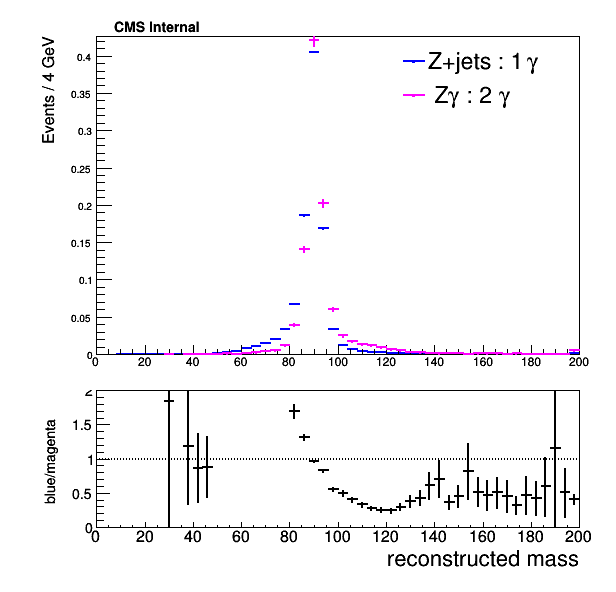

Info in <TCanvas::Print>: png file /tmp/tmpkzm8Z6.png has been created


In [28]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']

In [29]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,'doratio' : 1,  'normalize':1}
samples.CompareSelections('m_lep_ph', [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2 && trueph_motherPID==22"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample m_lep_ph_5
removing sample m_lep_ph_6
removing sample ratioZgamma
Creating hist for m_lep_ph_7
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_7
['DYJetsToLL_M-50']
Scale m_lep_ph_7 by 1.000000
Creating hist for m_lep_ph_8
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_motherPID==22 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_motherPID==22 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_8
['ZGTo2LG']
Scale m_lep_ph_8 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph_7 at 7f455440aef0>, <Sample m_lep_ph_8 at 7f45543e0878>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


In [30]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

### e+$\gamma_{1}$ mass in Zgamma events where generator photon is an ISR

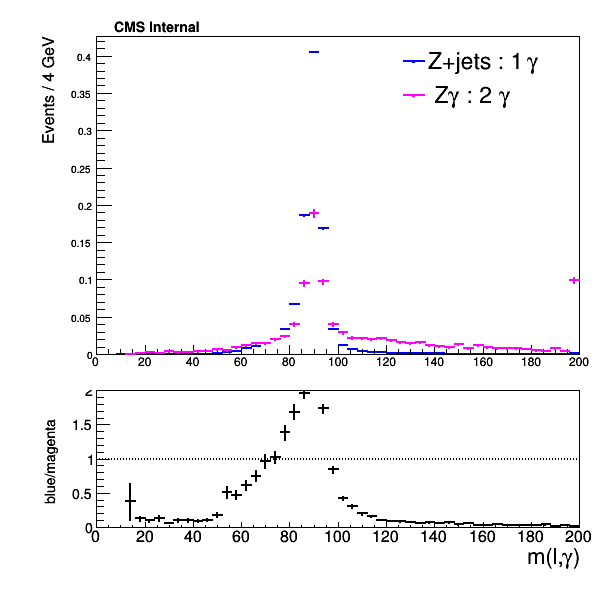

Info in <TCanvas::Print>: png file /tmp/tmpDK3XsP.png has been created


In [31]:
samples.curr_canvases['base']


In [32]:
cond="(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91))"
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,'doratio' : 1,  'normalize':1}
samples.CompareSelections(['m_lep_ph','m_lep_ph_comb_leadLep[1]*%s + m_lep_ph_comb_leadLep[0]*(!%s)' %(cond,cond)], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2 && trueph_motherPID==22"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma']})

removing sample m_lep_ph_7
removing sample m_lep_ph_8
removing sample ratioZgamma
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_9
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_9
['DYJetsToLL_M-50']
Scale m_lep_ph_9 by 1.000000
Creating hist for m_lep_ph_10
m_lep_ph_comb_leadLep[1]*(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91)) + m_lep_ph_comb_leadLep[0]*(!(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91))) : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 && trueph_motherPID==22 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[1]*(abs(m_lep_ph_comb_leadLep[0]-91)>abs(m_lep_ph_comb_leadLep[1]-91)) + m_lep_ph_comb_leadLep[0]*(!(abs(m_lep_ph_comb_le

In [33]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified();ROOT.gPad.Update()

### e+$\gamma_{1}$ or e+$\gamma_{2}$ mass in Zgamma events where generator photon is an ISR, whichever is closer to Z mass

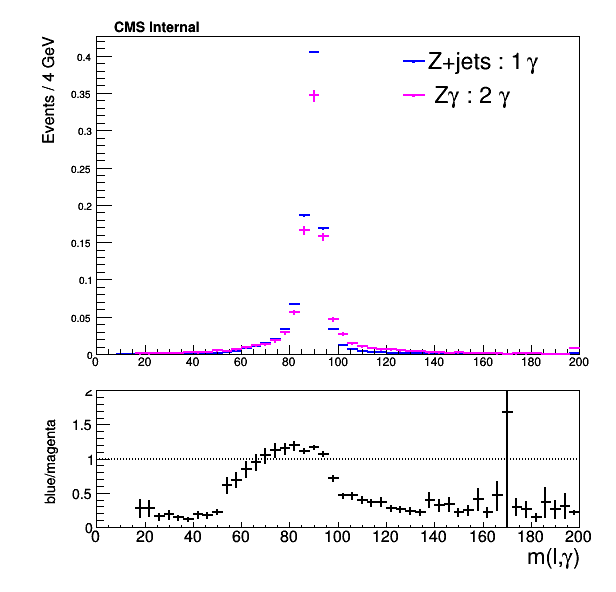

Info in <TCanvas::Print>: png file /tmp/tmpL_x3Vj.png has been created


In [34]:
samples.curr_canvases['base']


In [35]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'reconstructed mass',
               'rlabel':'blue/magenta' , 'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lpp_best'], [baseeta +"&& ph_n==1",baseeta +"&& ph_n==2"],
                          ['Z+jets','Zgamma'], (50,0,200),hist_config, {}, 
                          {'legend_entries':['Z+jets : 1 #gamma', ' Z#gamma : 2 #gamma, closest to m_{Z}']})

removing sample m_lep_ph_9
removing sample m_lep_ph_10
removing sample ratioZgamma
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_11
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==1 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_11
['DYJetsToLL_M-50']
Scale m_lep_ph_11 by 1.000000
Creating hist for m_lep_ph_12
m_lpp_best : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lpp_best : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_12
['ZGTo2LG']
Scale m_lep_ph_12 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph_11 at 7f45544141b8>, <Sample m_lep_ph_12 at 7f455440a200>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


### Solution: Choosing the reconstructed mass closest to Z

- we have 1 leptons and 2 photon objects. There are 3 meaningful ways to form invariant mass: $e + \gamma_{1}$,  $e + \gamma_{2}$, $e + \gamma_{1} + \gamma_{2}$.
- we can try to plot whichever of the three that is closest to the literature Z mass value

- The plot shows a rather clean distribution of Z peak, with a shift to the right (<5GeV)

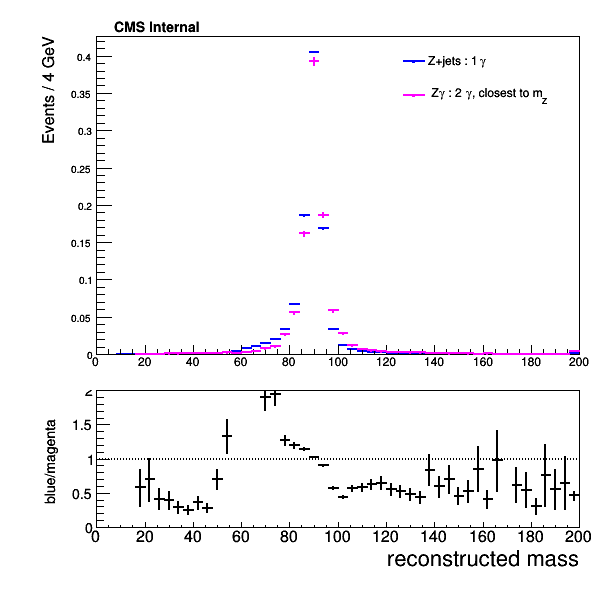

Info in <TCanvas::Print>: png file /tmp/tmppo2467.png has been created


In [36]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified(); ROOT.gPad.Update()
samples.curr_canvases['base']

In [37]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,#gamma)',
               'rlabel':'blue/magenta' ,
               'doratio' : 1,  'normalize':1}
samples.CompareSelections([ 'm_lep_ph', 'm_lep_ph_comb_leadLep[0]'], [baseeta +"&& ph_n==2",baseeta +"&& ph_n==2"],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['m_lep_ph', ' m_lep_ph_comb_leadLep[0]']})

removing sample m_lep_ph_11
removing sample m_lep_ph_12
removing sample ratioZgamma
Case when multiple vars is used is not implemented
Creating hist for m_lep_ph_13
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
m_lep_ph : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR m_lep_ph_13
['DYJetsToLL_M-50']
Scale m_lep_ph_13 by 1.000000
Creating hist for m_lep_ph_14
m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Draw grouped hist ZGTo2LG
Creating hist for ZGTo2LG
m_lep_ph_comb_leadLep[0] : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_n==2 
(50, 0, 200)
Scale ZGTo2LG by 0.453931
RUN GROUPING FOR m_lep_ph_14
['ZGTo2LG']
Scale m_lep_ph_14 by 1.000000
Scale ratioZgamma by 1.000000
[<Sample m_lep_ph_13 at 7f455440a200>, <Sample m_lep_ph_14 at 7f454818e128>]
{'name': '__AllStack__'}
{'name'

### not sure what is the difference with comb_leadLep

In [38]:
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

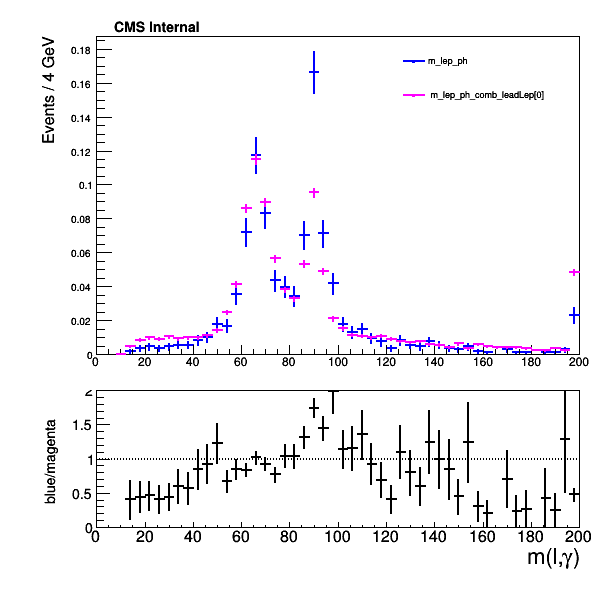

Info in <TCanvas::Print>: png file /tmp/tmpjeow0S.png has been created


In [39]:
samples.curr_canvases['base']


In [40]:
!date

Mon Sep 10 18:23:34 EDT 2018


In [41]:
!git status

# On branch masslepph
# Changes not staged for commit:
#   (use "git add <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   ../Analysis/TreeFilter/RecoResonance/scripts/scheduler.py
#	modified:   ../Analysis/Util/scripts/check_datasets_das.py
#	modified:   SampleManager.py
#	modified:   interactiveStackTree.py
#
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	../Generation/
#	.gitignore
#	cfiles/
#	otherpy/
#	readTFileContent/
#	rootnotes.py
#	temp/
#	uncertainties-3.0.1/
#	../_setup.sh
no changes added to commit (use "git add" and/or "git commit -a")
